## Loading Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

## Loading Required Files

- Whether a customer agrees to the term-deposit or not is based on various factors like job, education, loan details, socio-economic details, etc.
- Hence, all the files consisting of those details are loaded.

In [2]:
df_customer_details = pd.read_csv('Customer_and_bank details_p1.csv')
df_social_economic = pd.read_csv('Customer_social_economic_data_p1.csv')
df_campaign_details = pd.read_csv('Customer_campaign_details_p1.csv')
df_response_data = pd.read_csv('Customer_Response_data_p1.csv')

## Merging The Dataframes

- The details are present in separate files.
- To ease operations, we merge them into a single dataframe.
- The 'Customer_id' column is common in all 4 dataframes.
- Hence, it is used as a key for merging, meaning all columns are merged corresponding to the 'Customer_id'.

In [3]:
# Merge datasets on 'Customer_id' (assuming it's the common key)
df_merged = df_customer_details \
    .merge(df_social_economic, on='Customer_id') \
    .merge(df_campaign_details, on='Customer_id') \
    .merge(df_response_data, on='Customer_id')

## Printing The Dataframe

In [4]:
df_merged

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,4963.6,cellular,nov,fri,442,1,999,0,nonexistent,yes


## Printing The Datatype Of Each Column

In [5]:
df_merged.dtypes

Customer_id         int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
Region_Code        object
State_Code         object
City_Code          object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
y                  object
dtype: object

- Region_Code, State_Code and City_Code do not give us any information.
- The dataset would be more meaningful if instead of codes, we had their names.
- The names of region can be extracted from Region_code_master.csv file.
- The names of states can be extracted from State_master.csv file.
- The names of city can be extracted from City_master.csv file.

## Loading The Code Master Files

- We load all the code master csv files and check their datatypes.
- Merging can only be done if the datatype of common columns in both csv files is same.

In [6]:
# Loading the Region_code_master.csv file
region_master = pd.read_csv('Region_code_master.csv')
region_master.dtypes

Region_Name    object
Region_Code     int64
dtype: object

In [16]:
# Checking if there are any values which are present in the region_master but not in df_merged
print("Unique values in the 'Region_Code' column of df_merged: ", df_merged['Region_Code'].unique())
print("Unique values in the 'Region_Code' column of region_master: ", region_master['Region_Code'].unique())

Unique values in the 'Region_Code' column of df_merged:  ['3' '4' 'Na' '1' '2']
Unique values in the 'Region_Code' column of region_master:  [1 2 3 4 5]


Here, we see that 'Na' value is not present in region_master

In [7]:
# Loading the State_Master.csv file
state_master = pd.read_csv('State_Master.csv')
state_master.dtypes

State_Code     object
State_Name     object
Region_Code     int64
dtype: object

In [18]:
# Extract unique state codes from df_merged and state_master
dataset_codes = set(df_merged['State_Code'].unique())
state_master_codes = set(df_merged['State_Code'].unique())

# Find state codes in df_merged that are not in state_master
unmatched_codes = dataset_codes - state_master_codes

if unmatched_codes:
    print("These state codes in dataset are not found in state_master:")
    print(unmatched_codes)
else:
    print("All state codes in dataset are valid and found in state_master.")

All state codes in dataset are valid and found in state_master.


In [8]:
# Loading the State_Master.csv file
city_master = pd.read_csv('City_Master.csv')
city_master.dtypes

City_Code     object
City_Name     object
State_Code    object
dtype: object

In [19]:
# Extract unique city codes from df_merged and city_master
dataset_codes = set(df_merged['City_Code'].unique())
city_master_codes = set(city_master['City_Code'].unique())

# Find city codes in dataset that are not in city_master
unmatched_codes = dataset_codes - city_master_codes

if unmatched_codes:
    print("These city codes in dataset are not found in city_master:")
    print(unmatched_codes)
else:
    print("All city codes in dataset are valid and found in city_master.")

All city codes in dataset are valid and found in city_master.


- Since, datatype of Region_Code in df_merged is 'object' and that of Region_Code in region_master is 'int64', merging can't be made directly.
- Moreover, Region_Code in df_merged has null values but State_Code and City_Code do not.
- Hence, we will first merge the state and city names.

## Merging State Names

- Since, State_Master.csv already has a Region_Code column, we can ignore the Region_Code column in df_merged and extract region names from state_master.

In [20]:
# Dropping 'Region_Code' 
df_merged.drop('Region_Code', axis=1, inplace=True)

# Perform the merge operation
df_merged = df_merged.merge(state_master, on='State_Code', how='left')
df_merged.drop('State_Code', axis=1, inplace=True)
df_merged

,Customer_id,age,job,marital,education,default,housing,loan,City_Code,emp.var.rate,...,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,State_Name,Region_Code
0,1,56,services,married,high.school,no,no,yes,C1,1.1,...,may,mon,307,1,999,0,nonexistent,no,Kentucky,3
1,2,45,services,married,basic.9y,unknown,no,no,C1,1.1,...,may,mon,198,1,999,0,nonexistent,no,Kentucky,3
2,3,59,admin.,married,professional.course,no,no,no,C2,1.1,...,may,mon,139,1,999,0,nonexistent,no,California,4
3,4,41,blue-collar,married,unknown,unknown,no,no,C3,1.1,...,may,mon,217,1,999,0,nonexistent,no,Florida,3
4,5,24,technician,single,professional.course,no,yes,no,C3,1.1,...,may,mon,380,1,999,0,nonexistent,no,Florida,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,C21,-1.1,...,nov,fri,334,1,999,0,nonexistent,yes,New York,2
37080,37081,46,blue-collar,married,professional.course,no,no,no,C21,-1.1,...,nov,fri,383,1,999,0,nonexistent,no,New York,2
37081,37082,56,retired,married,university.degree,no,yes,no,C21,-1.1,...,nov,fri,189,2,999,0,nonexistent,no,New York,2
37082,37083,44,technician,married,professional.course,no,no,no,C49,-1.1,...,nov,fri,442,1,999,0,nonexistent,yes,Arizona,4


## Merging City Names

In [21]:
# Dropping 'State_Code' of df_merged
city_master.drop('State_Code', axis=1, inplace=True)

# Performing the merge operation
df_merged = df_merged.merge(city_master, on='City_Code', how='left')
df_merged.drop('City_Code', axis=1, inplace=True)
df_merged

,Customer_id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,...,day_of_week,duration,campaign,pdays,previous,poutcome,y,State_Name,Region_Code,City_Name
0,1,56,services,married,high.school,no,no,yes,1.1,93.994,...,mon,307,1,999,0,nonexistent,no,Kentucky,3,Henderson
1,2,45,services,married,basic.9y,unknown,no,no,1.1,93.994,...,mon,198,1,999,0,nonexistent,no,Kentucky,3,Henderson
2,3,59,admin.,married,professional.course,no,no,no,1.1,93.994,...,mon,139,1,999,0,nonexistent,no,California,4,Los Angeles
3,4,41,blue-collar,married,unknown,unknown,no,no,1.1,93.994,...,mon,217,1,999,0,nonexistent,no,Florida,3,Fort Lauderdale
4,5,24,technician,single,professional.course,no,yes,no,1.1,93.994,...,mon,380,1,999,0,nonexistent,no,Florida,3,Fort Lauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,-1.1,94.767,...,fri,334,1,999,0,nonexistent,yes,New York,2,New York City
37080,37081,46,blue-collar,married,professional.course,no,no,no,-1.1,94.767,...,fri,383,1,999,0,nonexistent,no,New York,2,New York City
37081,37082,56,retired,married,university.degree,no,yes,no,-1.1,94.767,...,fri,189,2,999,0,nonexistent,no,New York,2,New York City
37082,37083,44,technician,married,professional.course,no,no,no,-1.1,94.767,...,fri,442,1,999,0,nonexistent,yes,Arizona,4,Scottsdale


## Merging Region Names With Dataset

In [22]:
df_merged = df_merged.merge(region_master, on='Region_Code', how='left')
df_merged.drop('Region_Code', axis=1, inplace=True)
df_merged

,Customer_id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,...,day_of_week,duration,campaign,pdays,previous,poutcome,y,State_Name,City_Name,Region_Name
0,1,56,services,married,high.school,no,no,yes,1.1,93.994,...,mon,307,1,999,0,nonexistent,no,Kentucky,Henderson,South
1,2,45,services,married,basic.9y,unknown,no,no,1.1,93.994,...,mon,198,1,999,0,nonexistent,no,Kentucky,Henderson,South
2,3,59,admin.,married,professional.course,no,no,no,1.1,93.994,...,mon,139,1,999,0,nonexistent,no,California,Los Angeles,West
3,4,41,blue-collar,married,unknown,unknown,no,no,1.1,93.994,...,mon,217,1,999,0,nonexistent,no,Florida,Fort Lauderdale,South
4,5,24,technician,single,professional.course,no,yes,no,1.1,93.994,...,mon,380,1,999,0,nonexistent,no,Florida,Fort Lauderdale,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,-1.1,94.767,...,fri,334,1,999,0,nonexistent,yes,New York,New York City,East
37080,37081,46,blue-collar,married,professional.course,no,no,no,-1.1,94.767,...,fri,383,1,999,0,nonexistent,no,New York,New York City,East
37081,37082,56,retired,married,university.degree,no,yes,no,-1.1,94.767,...,fri,189,2,999,0,nonexistent,no,New York,New York City,East
37082,37083,44,technician,married,professional.course,no,no,no,-1.1,94.767,...,fri,442,1,999,0,nonexistent,yes,Arizona,Scottsdale,West


## Rearranging Columns In Datasets

In [23]:
new_order = ['Customer_id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'City_Name', 'State_Name', 'Region_Name', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_merged = df_merged[new_order]
df_merged

,Customer_id,age,job,marital,education,default,housing,loan,City_Name,State_Name,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,Henderson,Kentucky,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,Henderson,Kentucky,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,Los Angeles,California,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,Fort Lauderdale,Florida,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,Fort Lauderdale,Florida,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,New York City,New York,...,4963.6,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,New York City,New York,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,56,retired,married,university.degree,no,yes,no,New York City,New York,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,44,technician,married,professional.course,no,no,no,Scottsdale,Arizona,...,4963.6,cellular,nov,fri,442,1,999,0,nonexistent,yes


## Saving The Dataframe To dataset.csv

In [25]:
df_merged.to_csv('dataset.csv', index=False)

## Loading The Dataset

In [3]:
dataset = pd.read_csv('dataset.csv')

## Printing The Dataset

In [4]:
dataset

,Customer_id,age,job,marital,education,default,housing,loan,City_Name,State_Name,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,Henderson,Kentucky,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,Henderson,Kentucky,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,Los Angeles,California,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,Fort Lauderdale,Florida,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,Fort Lauderdale,Florida,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,New York City,New York,...,4963.6,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,New York City,New York,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,56,retired,married,university.degree,no,yes,no,New York City,New York,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,44,technician,married,professional.course,no,no,no,Scottsdale,Arizona,...,4963.6,cellular,nov,fri,442,1,999,0,nonexistent,yes


## Printing The Details About The Dataset Like Datatypes, Mean, etc.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   City_Name       37084 non-null  object 
 9   State_Name      37084 non-null  object 
 10  Region_Name     37084 non-null  object 
 11  emp.var.rate    37084 non-null  float64
 12  cons.price.idx  37084 non-null  float64
 13  cons.conf.idx   37084 non-null  float64
 14  euribor3m       37084 non-null  float64
 15  nr.employed     37084 non-null  float64
 16  contact         37084 non-null  object 
 17  month           37084 non-null 

In [6]:
dataset = dataset.drop(columns=['Customer_id'])
dataset.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,duration,campaign,pdays,previous
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,40.042714,0.082669,93.576076,-40.505183,3.621668,5167.058664,258.237946,2.569545,962.530849,0.172986
std,10.432965,1.568997,0.578493,4.622045,1.733972,72.196605,258.730909,2.770611,186.773063,0.495681
min,17.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,102.000000,1.000000,999.000000,0.000000
50%,38.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,319.250000,3.000000,999.000000,0.000000
max,98.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,4918.000000,56.000000,999.000000,7.000000


## Printing The Number Of Rows And Columns

In [7]:
dataset.shape

(37084, 24)

## Checking For Null Values

In [8]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
City_Name         0
State_Name        0
Region_Name       0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

It looks as if there are no null values but their are null values [Na].

## Modifying The 'education' Column

In [9]:
dataset['education'].value_counts()

university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
unknown                 1549
illiterate                16
Name: education, dtype: int64

- 'basic.4y', 'basic.6y' and 'basic.9y' all correspond to middle school education.
- Hence, they are replaced with 'middle school'.

In [10]:
# Define a mapping dictionary for replacement
replacement_dict = {
    'basic.4y': 'middle school',
    'basic.6y': 'middle school',
    'basic.9y': 'middle school'
}

# Replace the values in the 'education' column based on the dictionary
dataset['education'] = dataset['education'].replace(replacement_dict)

In [11]:
dataset['education'].value_counts()

middle school          11260
university.degree      10971
high.school             8542
professional.course     4746
unknown                 1549
illiterate                16
Name: education, dtype: int64

In [12]:
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,services,married,high.school,no,no,yes,Henderson,Kentucky,South,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,45,services,married,middle school,unknown,no,no,Henderson,Kentucky,South,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,59,admin.,married,professional.course,no,no,no,Los Angeles,California,West,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,41,blue-collar,married,unknown,unknown,no,no,Fort Lauderdale,Florida,South,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,24,technician,single,professional.course,no,yes,no,Fort Lauderdale,Florida,South,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,73,retired,married,professional.course,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,46,blue-collar,married,professional.course,no,no,no,New York City,New York,East,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,56,retired,married,university.degree,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,44,technician,married,professional.course,no,no,no,Scottsdale,Arizona,West,...,4963.6,cellular,nov,fri,442,1,999,0,nonexistent,yes


## Modifying The 'pdays' Column

- The value '999' in pdays means that a certain customer has not been contacted in the previous campaign.
- It does not mean that 999 days have passed since the customer has been contact.
- To avoid confusion, 999 has been replaced with 0.

In [13]:
dataset.loc[dataset['pdays'] == 999, 'pdays'] = 0
dataset['pdays'].value_counts()

0     35734
3       398
6       361
4       105
9        57
2        56
12       54
7        51
10       46
5        43
13       34
11       28
1        25
14       20
15       19
8        18
16       11
17        8
18        4
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

## Modifying The 'duration' Column

- 'duration' means call duration time.
- It is a numerical feature.
- To draw insights from it, we have to convert it to categorical feature.

In [14]:
call_duration_segment = []
for i in dataset['duration']:
    if i >=0 and i < 100:
        call_duration_segment.append('0')
    elif i >= 100 and i < 200:
        call_duration_segment.append('1')
    elif i >= 200 and i < 300:
        call_duration_segment.append('2')
    elif i >= 300 and i < 400:
        call_duration_segment.append('3')
    elif i >= 400 and i < 500:
        call_duration_segment.append('4')
    elif i >= 500 and i < 600:
        call_duration_segment.append('5')
    elif i >= 600 and i < 700:
        call_duration_segment.append('6')
    elif i >= 700 and i < 800:
        call_duration_segment.append('7')
    elif i >= 800 and i < 900:
        call_duration_segment.append('8')
    elif i >= 900 and i < 1000:
        call_duration_segment.append('9')
    elif i >= 1000 and i < 2000:
        call_duration_segment.append('10')
    elif i >= 2000 and i < 3000:
        call_duration_segment.append('11')
    elif i >= 3000 and i < 4000:
        call_duration_segment.append('12')
    else: 
        call_duration_segment.append('13')

dataset['call_duration_segment'] = call_duration_segment

In [15]:
dataset = dataset.astype({"call_duration_segment": int})

In [16]:
dataset.drop(columns='duration',inplace=True)

In [17]:
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment
0,56,services,married,high.school,no,no,yes,Henderson,Kentucky,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,3
1,45,services,married,middle school,unknown,no,no,Henderson,Kentucky,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,1
2,59,admin.,married,professional.course,no,no,no,Los Angeles,California,West,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,1
3,41,blue-collar,married,unknown,unknown,no,no,Fort Lauderdale,Florida,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,2
4,24,technician,single,professional.course,no,yes,no,Fort Lauderdale,Florida,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,73,retired,married,professional.course,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,yes,3
37080,46,blue-collar,married,professional.course,no,no,no,New York City,New York,East,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,no,3
37081,56,retired,married,university.degree,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,2,0,0,nonexistent,no,1
37082,44,technician,married,professional.course,no,no,no,Scottsdale,Arizona,West,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,yes,4


## Call Duration 

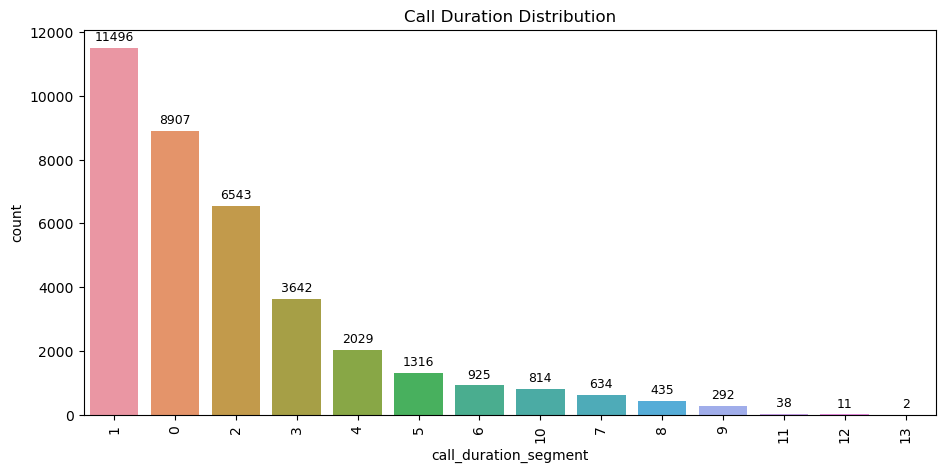

In [18]:
plt.figure(figsize=(11, 5))                                                                                                                                                                                                
plt.title('Call Duration Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
abs_values = dataset['call_duration_segment'].value_counts().values
ax = sns.countplot(x=dataset['call_duration_segment'],order=dataset['call_duration_segment'].value_counts().index)
ax.bar_label(container=ax.containers[0],labels=abs_values,padding=3)
plt.show()

Text(0.5, 1.0, 'Response Rate by Call Duration')

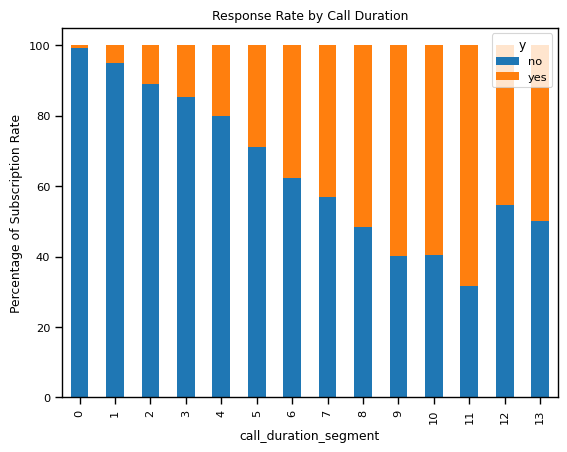

In [19]:
diff_categ_count=dataset['call_duration_segment'].value_counts()
group_table=dataset.groupby(['call_duration_segment','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Call Duration')

## Job

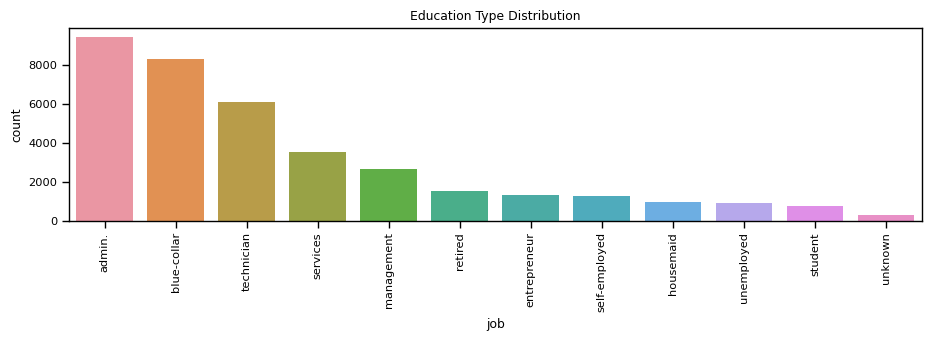

In [20]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Education Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['job'],order=dataset['job'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate by Job Type')

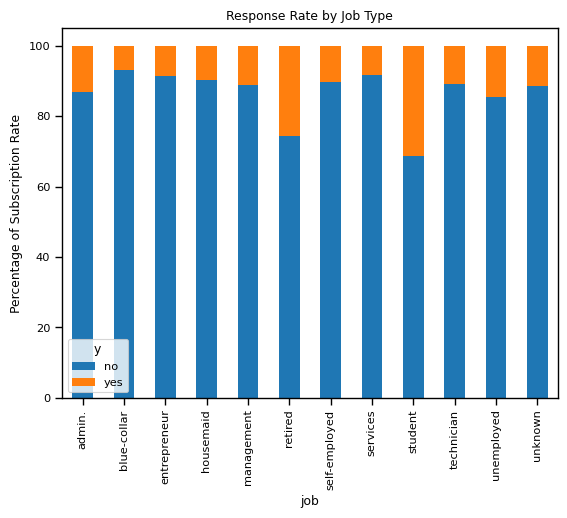

In [21]:
diff_categ_count=dataset['job'].value_counts()
group_table=dataset.groupby(['job','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Job Type')

## Marital Status

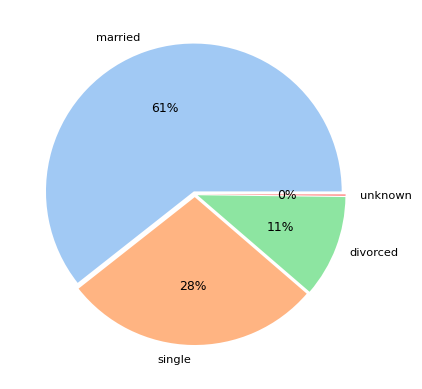

In [22]:
palette_color = sns.color_palette('pastel')[0:5]
explode = [0.02, 0.02, 0.02, 0.02]
plt.pie(dataset['marital'].value_counts().values, labels=dataset['marital'].value_counts().index, colors=palette_color, autopct='%.0f%%', explode=explode)
plt.show()

Text(0.5, 1.0, 'Response Rate by Marital Status')

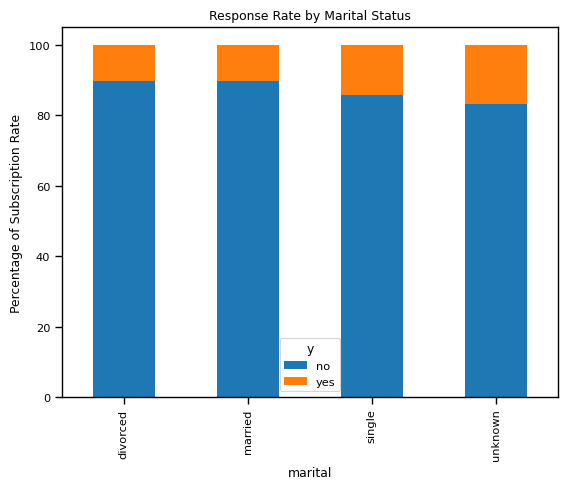

In [23]:
diff_categ_count=dataset['marital'].value_counts()
group_table=dataset.groupby(['marital','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Marital Status')

## Education Type

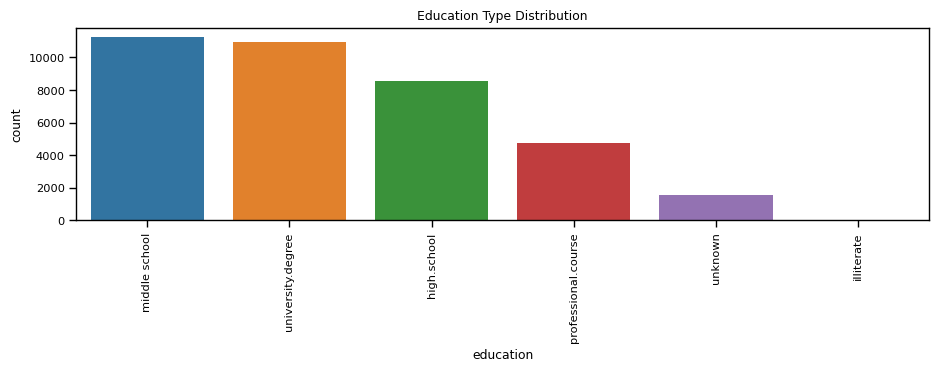

In [24]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Education Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['education'],order=dataset['education'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate by Education Type')

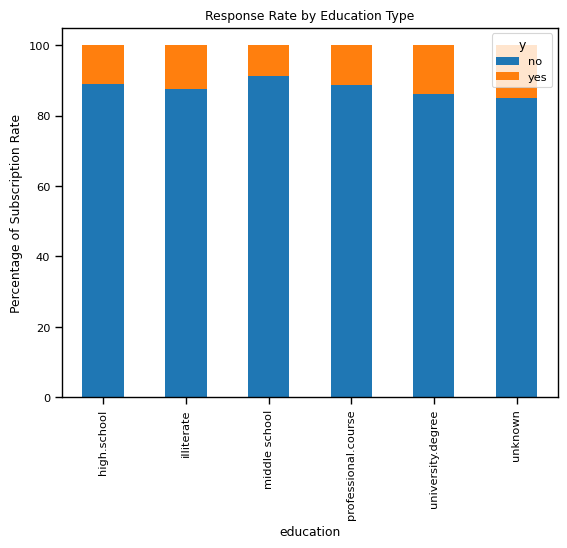

In [25]:
diff_categ_count=dataset['education'].value_counts()
group_table=dataset.groupby(['education','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Education Type')

## Default

- default means whether the customer has credit in default.

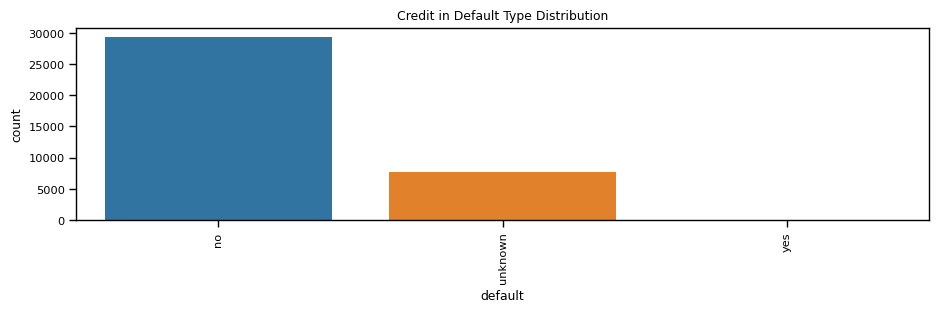

In [26]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Credit in Default Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['default'],order=dataset['default'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate by Credit Type')

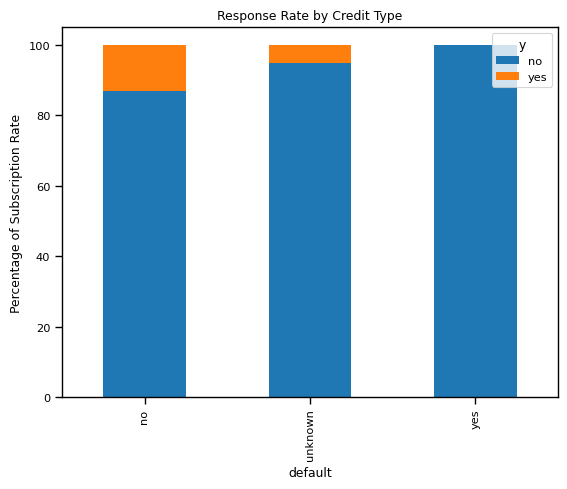

In [27]:
diff_categ_count=dataset['default'].value_counts()
group_table=dataset.groupby(['default','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Credit Type')

## Housing Loan Type Distribution

Housing column represents whether a given customer has a housing loan or not.

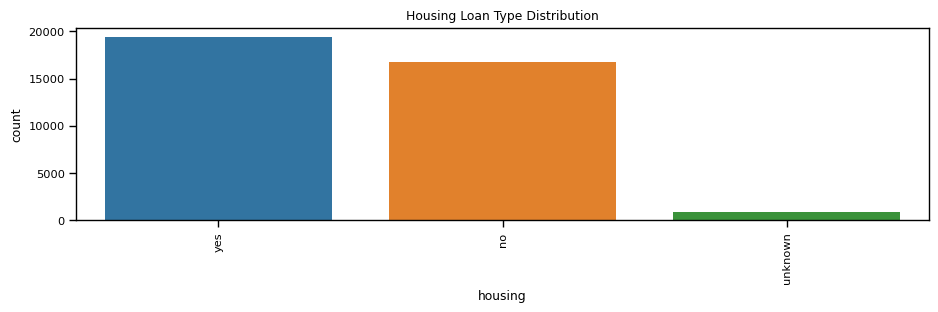

In [28]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Housing Loan Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['housing'],order=dataset['housing'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate by Housing Loan Type')

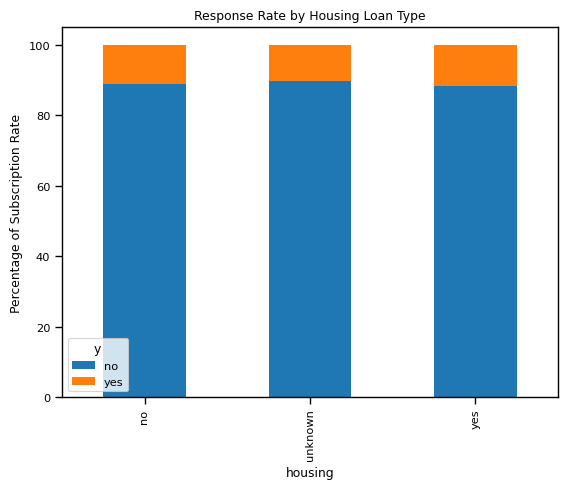

In [29]:
diff_categ_count=dataset['housing'].value_counts()
group_table=dataset.groupby(['housing','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Housing Loan Type')

## Loan Type

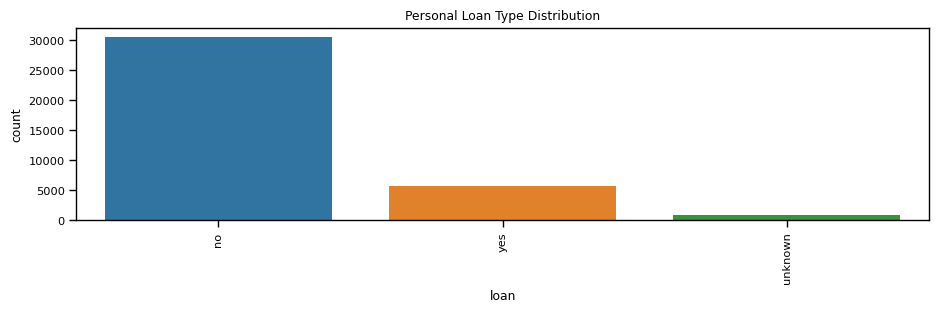

In [30]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Personal Loan Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['loan'],order=dataset['loan'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate by Loan Type')

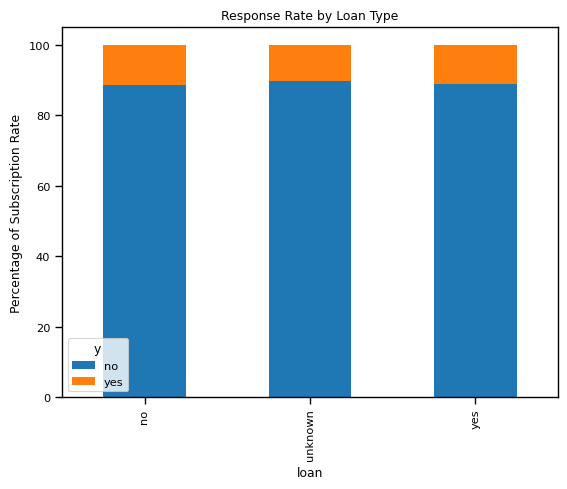

In [31]:
diff_categ_count=dataset['loan'].value_counts()
group_table=dataset.groupby(['loan','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Loan Type')

## Contact Type

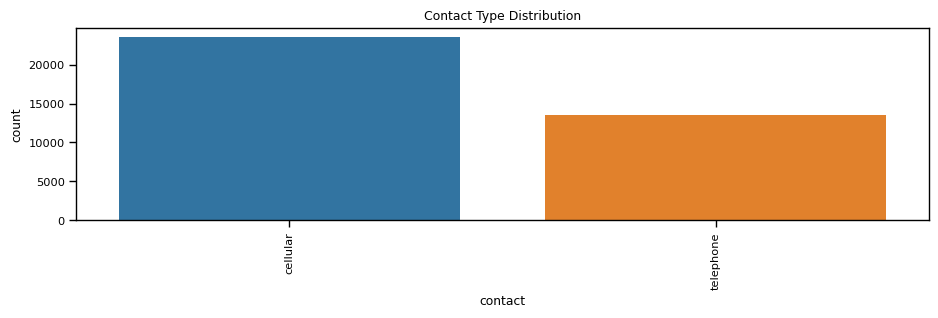

In [33]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Contact Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['contact'],order=dataset['contact'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate by Contact Type')

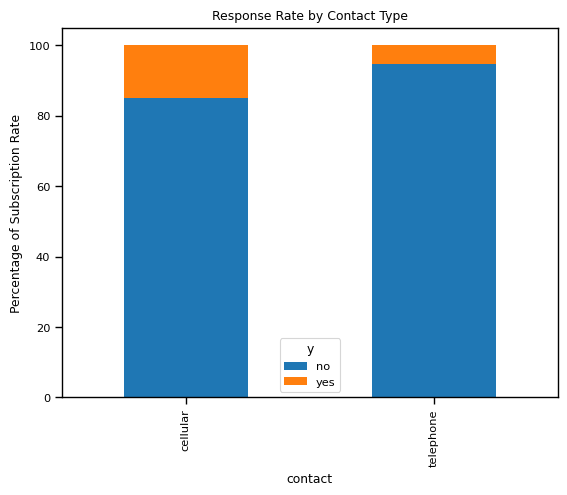

In [34]:
diff_categ_count=dataset['contact'].value_counts()
group_table=dataset.groupby(['contact','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate by Contact Type')

## poutcome

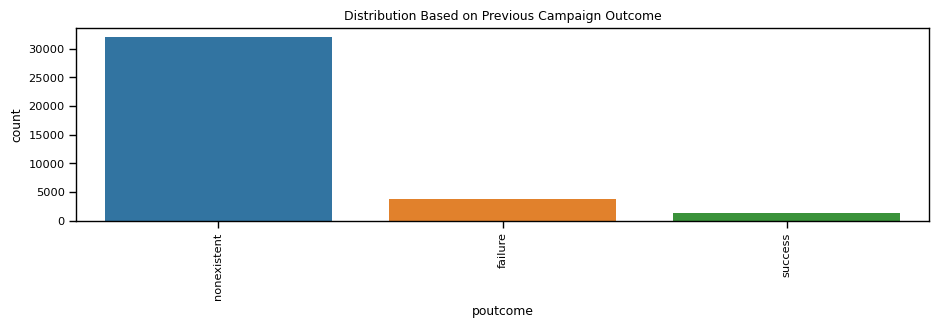

In [35]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Distribution Based on Previous Campaign Outcome')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['poutcome'],order=dataset['poutcome'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate Based on Previous Campaign Outcome')

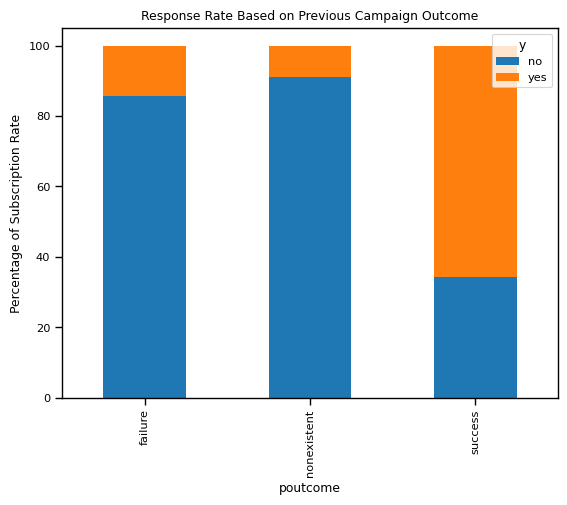

In [36]:
diff_categ_count=dataset['poutcome'].value_counts()
group_table=dataset.groupby(['poutcome','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate Based on Previous Campaign Outcome')

## State Wise Distribution

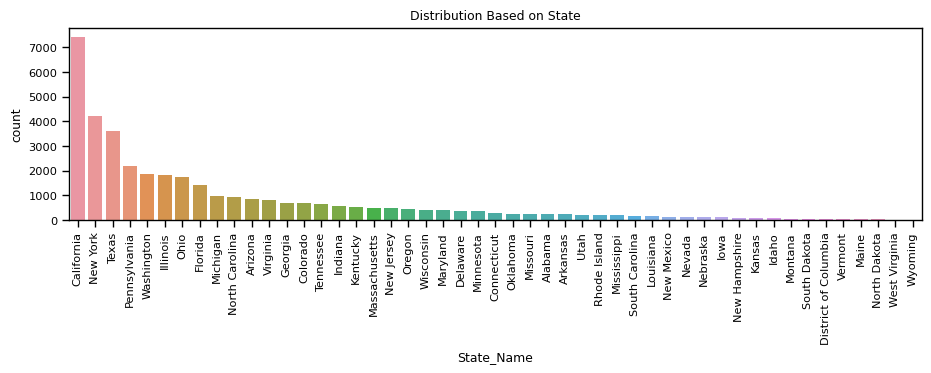

In [37]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Distribution Based on State')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['State_Name'],order=dataset['State_Name'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate Based on State')

<Figure size 2000x1600 with 0 Axes>

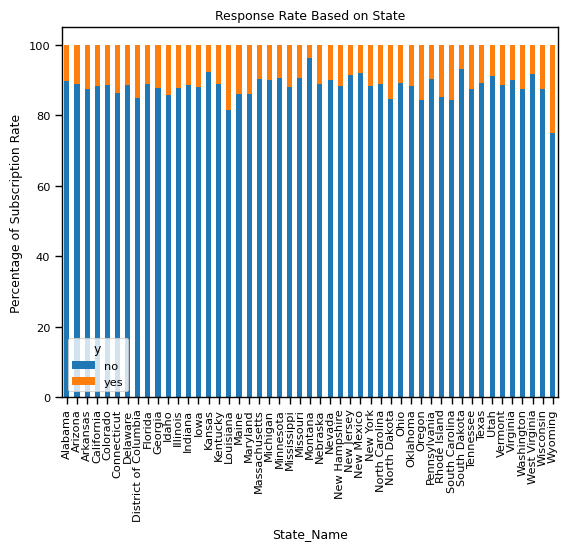

In [38]:
plt.figure(figsize=(20, 16))
diff_categ_count=dataset['State_Name'].value_counts()
group_table=dataset.groupby(['State_Name','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate Based on State')

## Region Wise Distribution

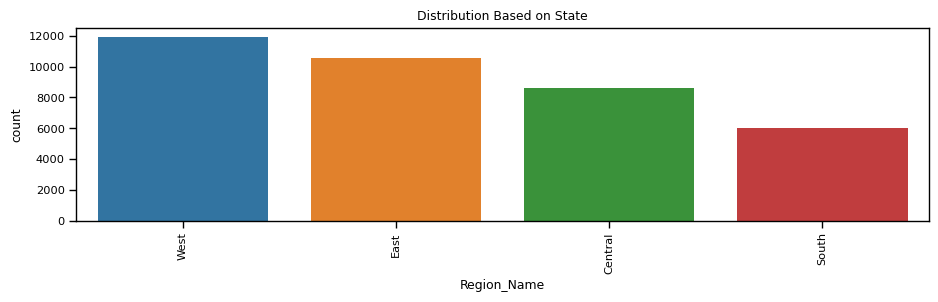

In [39]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Distribution Based on State')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['Region_Name'],order=dataset['Region_Name'].value_counts().index)
plt.show()

Text(0.5, 1.0, 'Response Rate Based on Region')

<Figure size 2000x1600 with 0 Axes>

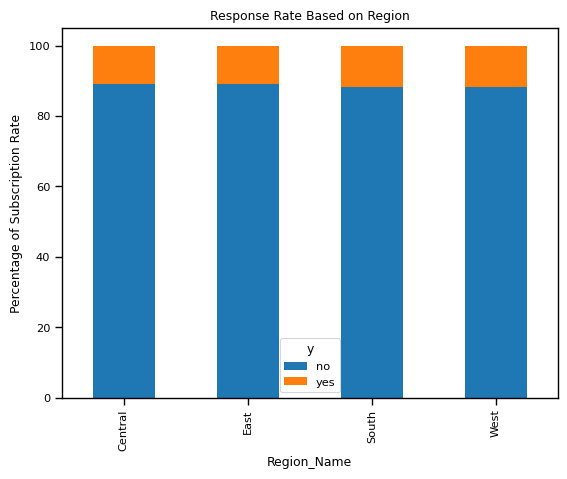

In [40]:
plt.figure(figsize=(20, 16))
diff_categ_count=dataset['Region_Name'].value_counts()
group_table=dataset.groupby(['Region_Name','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Response Rate Based on Region')

## Outlier Handling

C:\Users\ishit\AppData\Local\Temp\ipykernel_30408\822211157.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'No of employees')

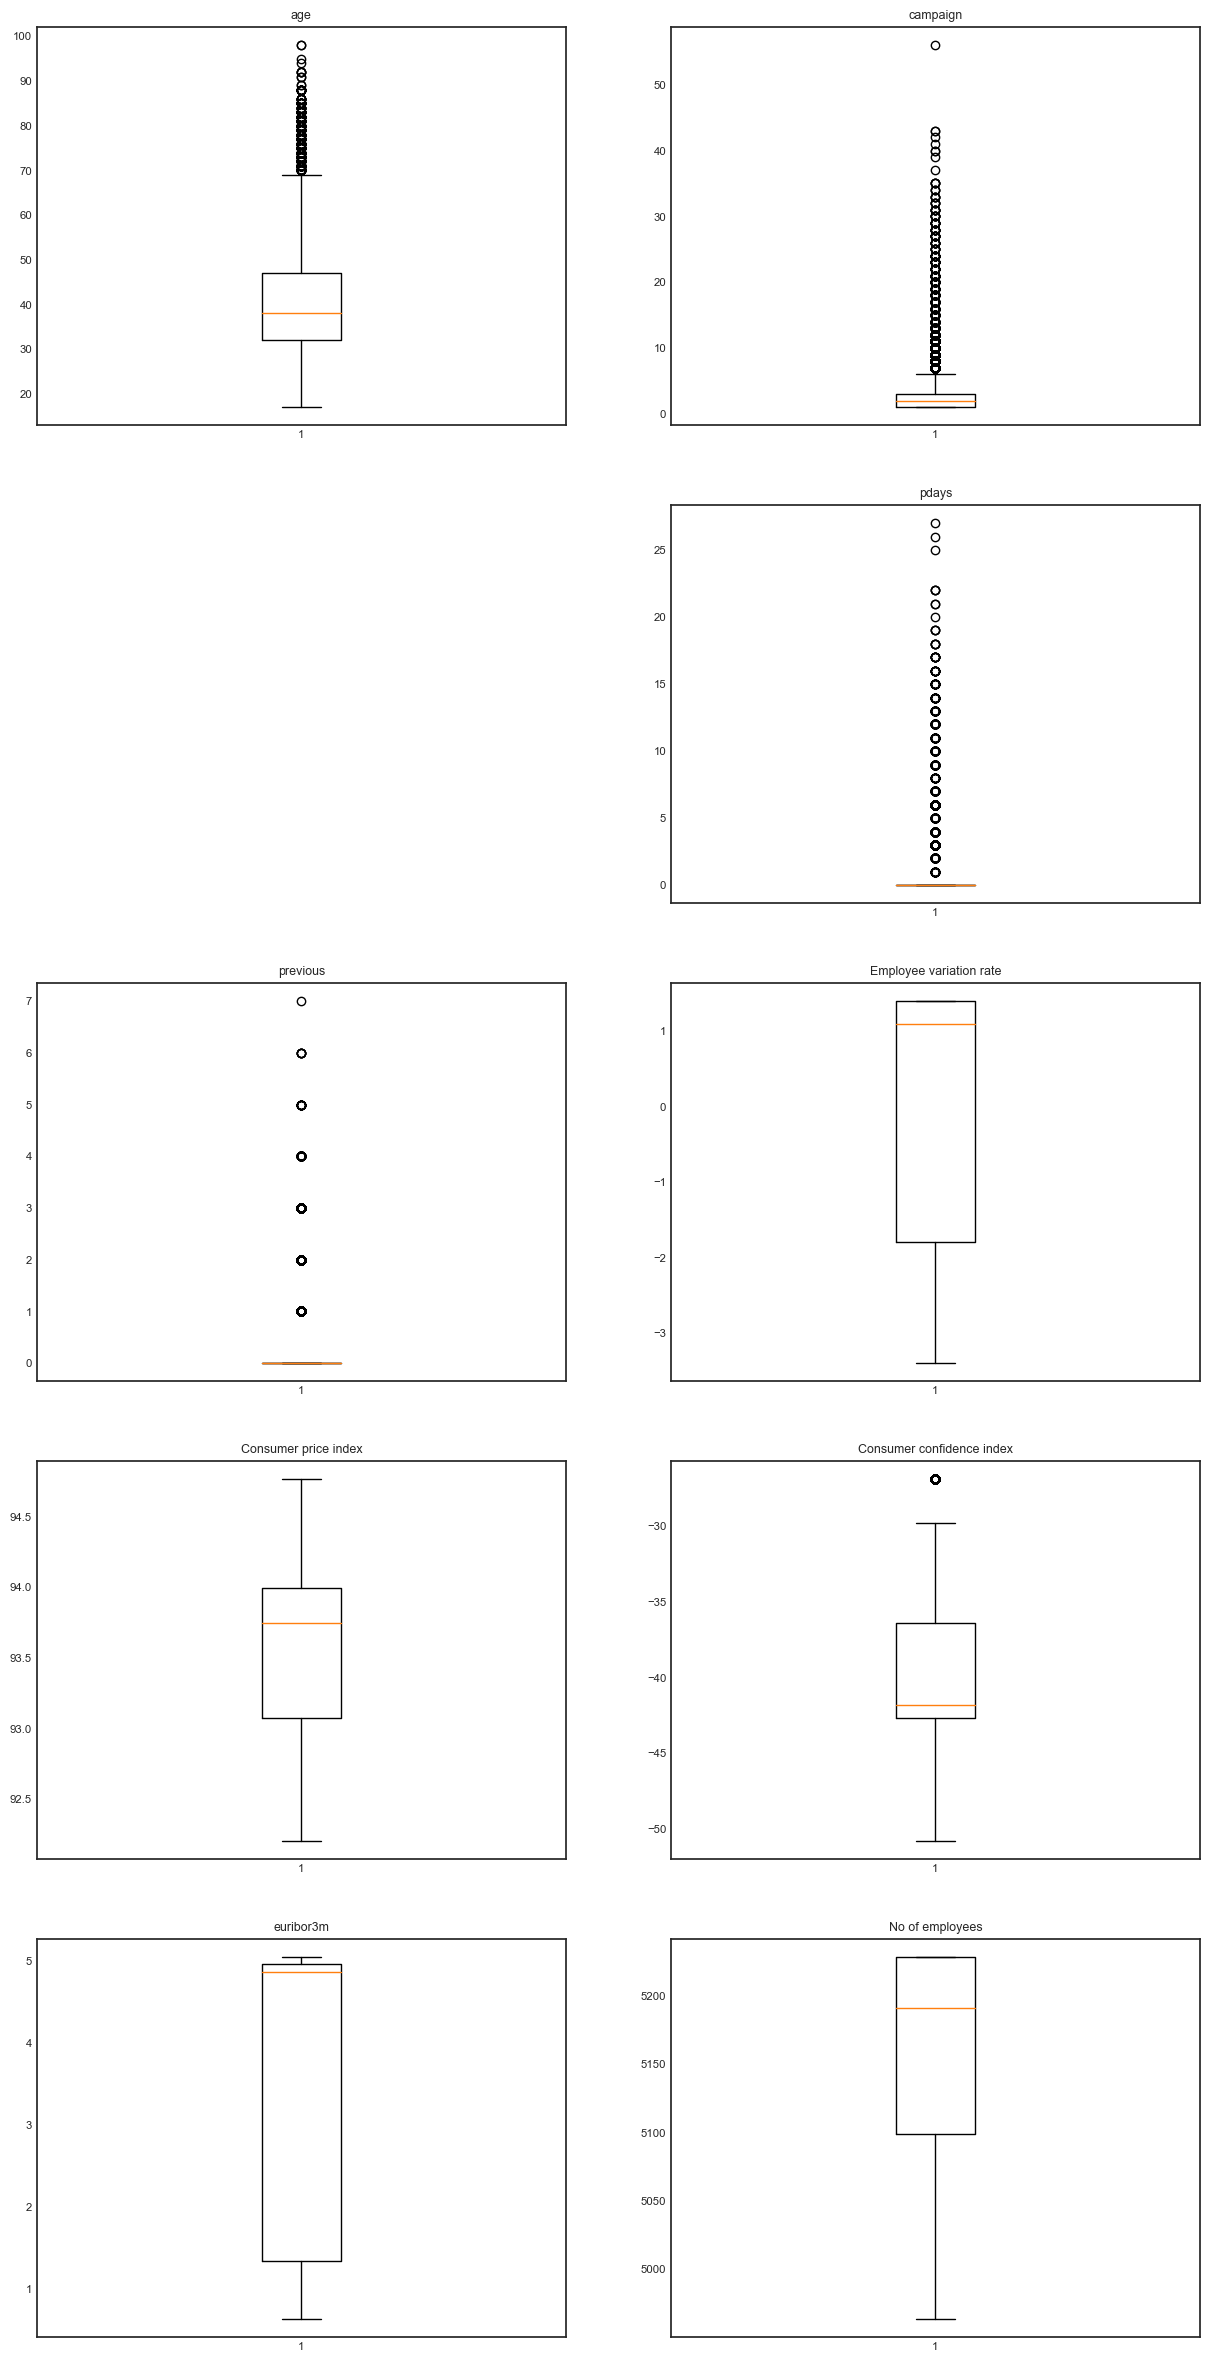

In [41]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(dataset['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(dataset['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(dataset['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(dataset['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(dataset['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(dataset['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(dataset['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(dataset['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(dataset['nr.employed'])
ax.set_title('No of employees')

- Columns 'age' and 'campaign' have outliers.

In [42]:
numerical_features=['age','campaign']
for cols in numerical_features:
    Q1 = dataset[cols].quantile(0.25)
    Q3 = dataset[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (dataset[cols] >= Q1 - 1.5 * IQR) & (dataset[cols] <= Q3 + 1.5 *IQR)
    dataset=dataset.loc[filter]

C:\Users\ishit\AppData\Local\Temp\ipykernel_30408\2502648372.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'campaign')

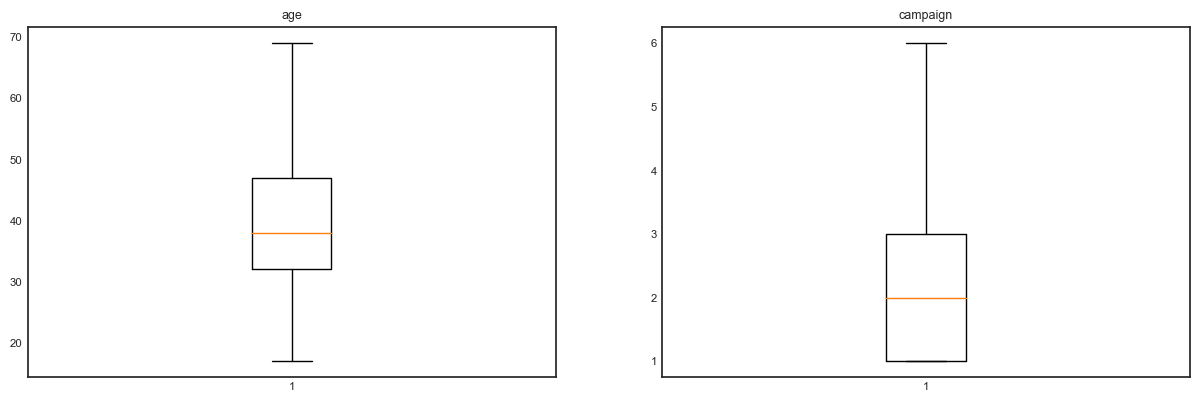

In [43]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(dataset['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(dataset['campaign'])
ax.set_title('campaign')

## Encoding The Columns

### Frequency Encoding Of 'job', 'education', 'City_Names', 'State_Names' and 'Region_Names'

#### Job

In [44]:
dataset_job=dataset['job'].value_counts().to_dict()
dataset['job']=dataset['job'].map(dataset_job)

#### Education

In [45]:
dataset_ed=dataset['education'].value_counts().to_dict()
dataset['education']=dataset['education'].map(dataset_ed)

In [46]:
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment
0,56,3332,married,8020,no,no,yes,Henderson,Kentucky,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,3
1,45,3332,married,10380,unknown,no,no,Henderson,Kentucky,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,1
2,59,8834,married,4422,no,no,no,Los Angeles,California,West,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,1
3,41,7843,married,1413,unknown,no,no,Fort Lauderdale,Florida,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,2
4,24,5720,single,4422,no,yes,no,Fort Lauderdale,Florida,South,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,divorced,4422,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,3,0,0,nonexistent,no,1
37078,37,8834,married,10229,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,yes,2
37080,46,7843,married,4422,no,no,no,New York City,New York,East,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,no,3
37081,56,1095,married,10229,no,yes,no,New York City,New York,East,...,4963.6,cellular,nov,fri,2,0,0,nonexistent,no,1


#### City

In [47]:
dataset_city=dataset['City_Name'].value_counts().to_dict()
dataset['City_Name']=dataset['City_Name'].map(dataset_city)

#### State

In [48]:
dataset_state=dataset['State_Name'].value_counts().to_dict()
dataset['State_Name']=dataset['State_Name'].map(dataset_state)

#### Region

In [49]:
dataset_region=dataset['Region_Name'].value_counts().to_dict()
dataset['Region_Name']=dataset['Region_Name'].map(dataset_region)

In [50]:
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment
0,56,3332,married,8020,no,no,yes,183,487,5594,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,3
1,45,3332,married,10380,unknown,no,no,183,487,5594,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,1
2,59,8834,married,4422,no,no,no,2568,6867,11072,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,1
3,41,7843,married,1413,unknown,no,no,52,1317,5594,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,2
4,24,5720,single,4422,no,yes,no,52,1317,5594,...,5191.0,telephone,may,mon,1,0,0,nonexistent,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,divorced,4422,no,yes,no,3167,3909,9837,...,4963.6,cellular,nov,fri,3,0,0,nonexistent,no,1
37078,37,8834,married,10229,no,yes,no,3167,3909,9837,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,yes,2
37080,46,7843,married,4422,no,no,no,3167,3909,9837,...,4963.6,cellular,nov,fri,1,0,0,nonexistent,no,3
37081,56,1095,married,10229,no,yes,no,3167,3909,9837,...,4963.6,cellular,nov,fri,2,0,0,nonexistent,no,1


### Label Encoding 'month', 'day_of_week', 'default', 'housing', 'loan' and 'y'

#### Month

In [51]:
dataset['month'].value_counts()

may    11799
jul     5780
aug     5071
jun     4340
nov     3607
apr     2292
oct      566
sep      451
mar      431
dec      141
Name: month, dtype: int64

In [52]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
dataset['month']= dataset['month'].map(month_dict) 

#### Days Of Week

In [53]:
dataset['day_of_week'].value_counts()

mon    7186
thu    7176
wed    6858
tue    6795
fri    6463
Name: day_of_week, dtype: int64

In [54]:
day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
dataset['day_of_week']= dataset['day_of_week'].map(day_dict) 

In [55]:
dataset['day_of_week'].value_counts()

2    7186
5    7176
4    6858
3    6795
6    6463
Name: day_of_week, dtype: int64

In [56]:
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment
0,56,3332,married,8020,no,no,yes,183,487,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,3
1,45,3332,married,10380,unknown,no,no,183,487,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,1
2,59,8834,married,4422,no,no,no,2568,6867,11072,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,1
3,41,7843,married,1413,unknown,no,no,52,1317,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,2
4,24,5720,single,4422,no,yes,no,52,1317,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,divorced,4422,no,yes,no,3167,3909,9837,...,4963.6,cellular,11,6,3,0,0,nonexistent,no,1
37078,37,8834,married,10229,no,yes,no,3167,3909,9837,...,4963.6,cellular,11,6,1,0,0,nonexistent,yes,2
37080,46,7843,married,4422,no,no,no,3167,3909,9837,...,4963.6,cellular,11,6,1,0,0,nonexistent,no,3
37081,56,1095,married,10229,no,yes,no,3167,3909,9837,...,4963.6,cellular,11,6,2,0,0,nonexistent,no,1


#### Default

In [57]:
dataset['default'].value_counts()

no         27370
unknown     7106
yes            2
Name: default, dtype: int64

In [58]:
dictionary={'yes':1,'no':0,'unknown':-1}
dataset['default']=dataset['default'].map(dictionary)

#### Housing

In [59]:
dataset['housing'].value_counts()

yes        18088
no         15575
unknown      815
Name: housing, dtype: int64

In [60]:
dataset['housing']=dataset['housing'].map(dictionary)

#### Loan

In [61]:
dataset['loan'].value_counts()

no         28418
yes         5245
unknown      815
Name: loan, dtype: int64

In [62]:
dataset['loan']=dataset['loan'].map(dictionary)

In [63]:
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment
0,56,3332,married,8020,0,0,1,183,487,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,3
1,45,3332,married,10380,-1,0,0,183,487,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,1
2,59,8834,married,4422,0,0,0,2568,6867,11072,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,1
3,41,7843,married,1413,-1,0,0,52,1317,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,2
4,24,5720,single,4422,0,1,0,52,1317,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,divorced,4422,0,1,0,3167,3909,9837,...,4963.6,cellular,11,6,3,0,0,nonexistent,no,1
37078,37,8834,married,10229,0,1,0,3167,3909,9837,...,4963.6,cellular,11,6,1,0,0,nonexistent,yes,2
37080,46,7843,married,4422,0,0,0,3167,3909,9837,...,4963.6,cellular,11,6,1,0,0,nonexistent,no,3
37081,56,1095,married,10229,0,1,0,3167,3909,9837,...,4963.6,cellular,11,6,2,0,0,nonexistent,no,1


#### y

In [64]:
dataset['y'].value_counts()

no     30568
yes     3910
Name: y, dtype: int64

In [65]:
dictionary1={'no':0,'yes':1}
dataset['y']=dataset['y'].map(dictionary1)
dataset

,age,job,marital,education,default,housing,loan,City_Name,State_Name,Region_Name,...,nr.employed,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment
0,56,3332,married,8020,0,0,1,183,487,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,0,3
1,45,3332,married,10380,-1,0,0,183,487,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,0,1
2,59,8834,married,4422,0,0,0,2568,6867,11072,...,5191.0,telephone,5,2,1,0,0,nonexistent,0,1
3,41,7843,married,1413,-1,0,0,52,1317,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,0,2
4,24,5720,single,4422,0,1,0,52,1317,5594,...,5191.0,telephone,5,2,1,0,0,nonexistent,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,divorced,4422,0,1,0,3167,3909,9837,...,4963.6,cellular,11,6,3,0,0,nonexistent,0,1
37078,37,8834,married,10229,0,1,0,3167,3909,9837,...,4963.6,cellular,11,6,1,0,0,nonexistent,1,2
37080,46,7843,married,4422,0,0,0,3167,3909,9837,...,4963.6,cellular,11,6,1,0,0,nonexistent,0,3
37081,56,1095,married,10229,0,1,0,3167,3909,9837,...,4963.6,cellular,11,6,2,0,0,nonexistent,0,1


### Mean Encoding 'marital' Based On Mean Of 'y'

In [66]:
dataset.groupby(['marital'])['y'].mean()

marital
divorced    0.095657
married     0.100460
single      0.147275
unknown     0.190476
Name: y, dtype: float64

In [67]:
ordinal_labels=dataset.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [68]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [69]:
dataset['marital_ordinal']=dataset['marital'].map(ordinal_labels2)
dataset.drop(['marital'], axis=1,inplace=True)

In [70]:
dataset.marital_ordinal.value_counts()

1    20864
2     9798
0     3753
3       63
Name: marital_ordinal, dtype: int64

In [71]:
dataset

,age,job,education,default,housing,loan,City_Name,State_Name,Region_Name,emp.var.rate,...,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,call_duration_segment,marital_ordinal
0,56,3332,8020,0,0,1,183,487,5594,1.1,...,telephone,5,2,1,0,0,nonexistent,0,3,1
1,45,3332,10380,-1,0,0,183,487,5594,1.1,...,telephone,5,2,1,0,0,nonexistent,0,1,1
2,59,8834,4422,0,0,0,2568,6867,11072,1.1,...,telephone,5,2,1,0,0,nonexistent,0,1,1
3,41,7843,1413,-1,0,0,52,1317,5594,1.1,...,telephone,5,2,1,0,0,nonexistent,0,2,1
4,24,5720,4422,0,1,0,52,1317,5594,1.1,...,telephone,5,2,1,0,0,nonexistent,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,4422,0,1,0,3167,3909,9837,-1.1,...,cellular,11,6,3,0,0,nonexistent,0,1,0
37078,37,8834,10229,0,1,0,3167,3909,9837,-1.1,...,cellular,11,6,1,0,0,nonexistent,1,2,1
37080,46,7843,4422,0,0,0,3167,3909,9837,-1.1,...,cellular,11,6,1,0,0,nonexistent,0,3,1
37081,56,1095,10229,0,1,0,3167,3909,9837,-1.1,...,cellular,11,6,2,0,0,nonexistent,0,1,1


### Encoding 'poutcome' And 'contact' Using Pandas

In [72]:
dataset['poutcome'].value_counts()

nonexistent    29692
failure         3645
success         1141
Name: poutcome, dtype: int64

In [73]:
dataset['contact'].value_counts()

cellular     22001
telephone    12477
Name: contact, dtype: int64

In [74]:
Contact=pd.get_dummies(dataset['contact'], prefix='contact',drop_first=True)
Outcome=pd.get_dummies(dataset['poutcome'], prefix='poutcome',drop_first=True)
dataset = pd.concat([dataset,Contact,Outcome],axis=1)
dataset.drop(['contact','poutcome'],axis=1, inplace=True)

In [75]:
dataset

,age,job,education,default,housing,loan,City_Name,State_Name,Region_Name,emp.var.rate,...,day_of_week,campaign,pdays,previous,y,call_duration_segment,marital_ordinal,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,3332,8020,0,0,1,183,487,5594,1.1,...,2,1,0,0,0,3,1,1,1,0
1,45,3332,10380,-1,0,0,183,487,5594,1.1,...,2,1,0,0,0,1,1,1,1,0
2,59,8834,4422,0,0,0,2568,6867,11072,1.1,...,2,1,0,0,0,1,1,1,1,0
3,41,7843,1413,-1,0,0,52,1317,5594,1.1,...,2,1,0,0,0,2,1,1,1,0
4,24,5720,4422,0,1,0,52,1317,5594,1.1,...,2,1,0,0,0,3,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37077,64,1095,4422,0,1,0,3167,3909,9837,-1.1,...,6,3,0,0,0,1,0,0,1,0
37078,37,8834,10229,0,1,0,3167,3909,9837,-1.1,...,6,1,0,0,1,2,1,0,1,0
37080,46,7843,4422,0,0,0,3167,3909,9837,-1.1,...,6,1,0,0,0,3,1,0,1,0
37081,56,1095,10229,0,1,0,3167,3909,9837,-1.1,...,6,2,0,0,0,1,1,0,1,0


## Scaling The Features

In [76]:
from sklearn.preprocessing import StandardScaler

dataset_scale=dataset.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'marital_ordinal']


feature_scale=[feature for feature in dataset_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(dataset_scale[feature_scale])

StandardScaler()

In [77]:
scaled_dataset = pd.concat([dataset_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_dataset

,job,education,default,housing,loan,month,day_of_week,y,contact_telephone,poutcome_nonexistent,...,Region_Name,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,call_duration_segment
0,3332,8020,0,0,1,5,2,0,1,1,...,-1.832520,0.661363,0.739181,0.900020,0.721331,0.340460,-0.816947,-0.162487,-0.353135,0.418254
1,3332,10380,-1,0,0,5,2,0,1,1,...,-1.832520,0.661363,0.739181,0.900020,0.721331,0.340460,-0.816947,-0.162487,-0.353135,-0.470341
2,8834,4422,0,0,0,5,2,0,1,1,...,1.018947,0.661363,0.739181,0.900020,0.721331,0.340460,-0.816947,-0.162487,-0.353135,-0.470341
3,7843,1413,-1,0,0,5,2,0,1,1,...,-1.832520,0.661363,0.739181,0.900020,0.721331,0.340460,-0.816947,-0.162487,-0.353135,-0.026043
4,5720,4422,0,1,0,5,2,0,1,1,...,-1.832520,0.661363,0.739181,0.900020,0.721331,0.340460,-0.816947,-0.162487,-0.353135,0.418254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,1095,4422,0,1,0,11,6,0,0,1,...,0.376091,-0.745439,2.081250,-2.221779,-1.490161,-2.837318,0.744530,-0.162487,-0.353135,-0.470341
34474,8834,10229,0,1,0,11,6,1,0,1,...,0.376091,-0.745439,2.081250,-2.221779,-1.490161,-2.837318,-0.816947,-0.162487,-0.353135,-0.026043
34475,7843,4422,0,0,0,11,6,0,0,1,...,0.376091,-0.745439,2.081250,-2.221779,-1.490161,-2.837318,-0.816947,-0.162487,-0.353135,0.418254
34476,1095,10229,0,1,0,11,6,0,0,1,...,0.376091,-0.745439,2.081250,-2.221779,-1.490161,-2.837318,-0.036209,-0.162487,-0.353135,-0.470341


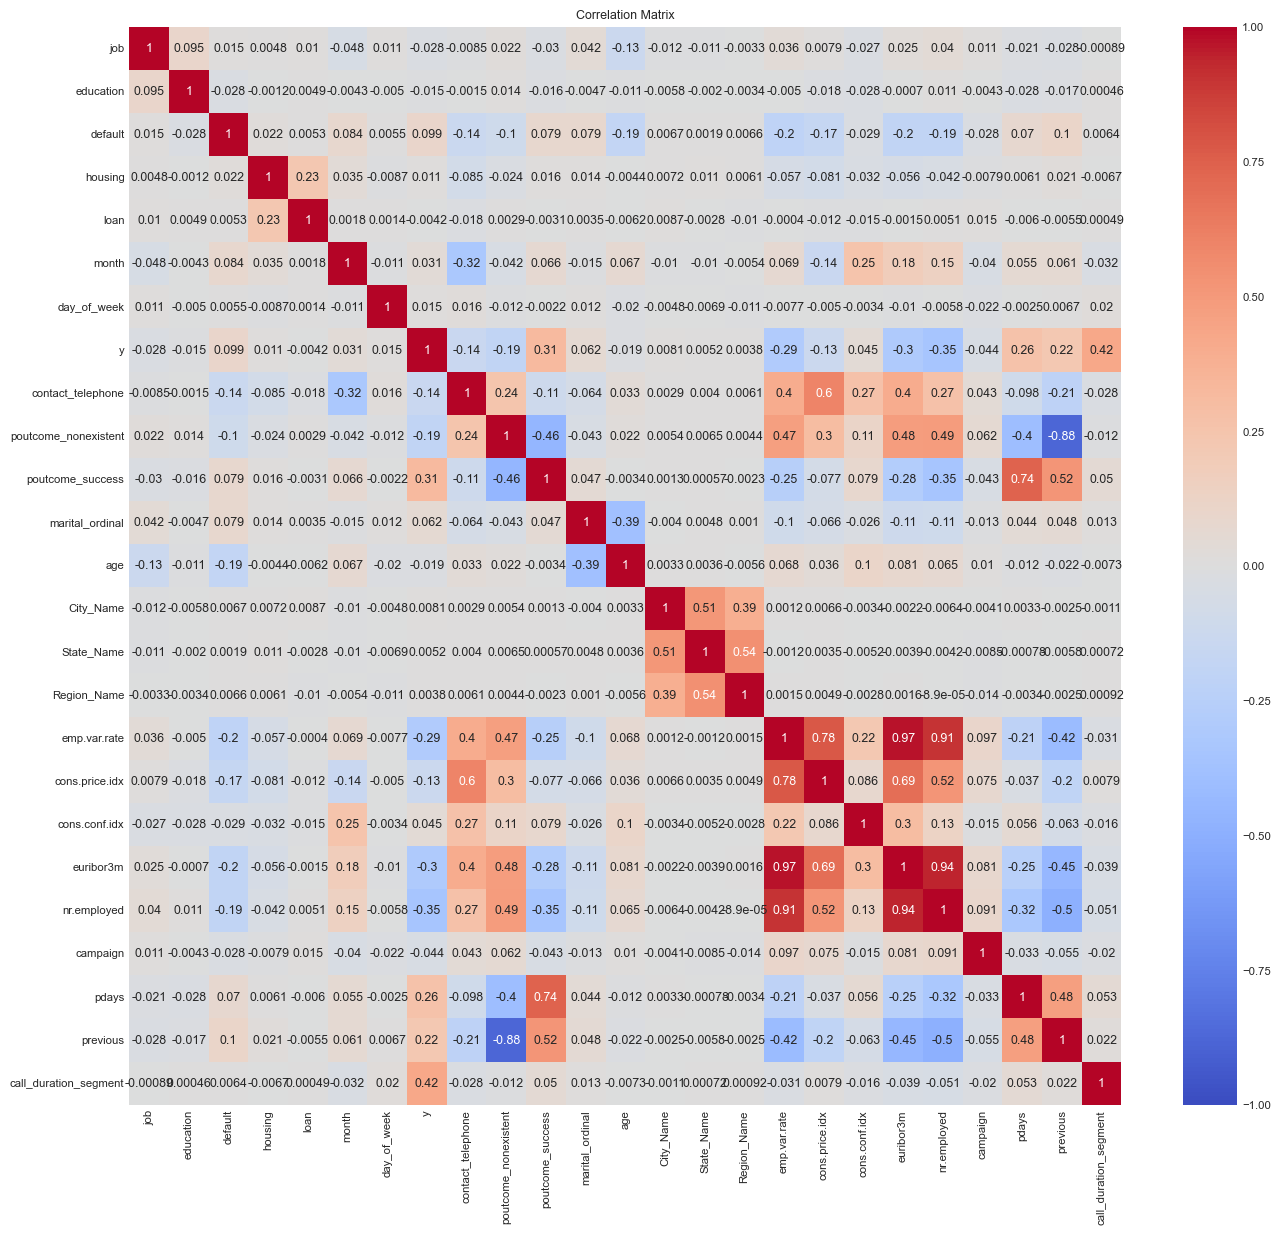

In [78]:
correlation_matrix = scaled_dataset.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Building The Model Using All Features

In [79]:
from sklearn.linear_model import LogisticRegression
y=scaled_dataset['y']
X=scaled_dataset.drop(['y'],axis=1)

model = LogisticRegression(max_iter = 1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

## Feature Selection

### Displaying The Contribution Of Each Feature Towards The Model

In [80]:
# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients to see most important features
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display feature importance
print(feature_importance)

                  Feature  Coefficient  Absolute Coefficient
23  call_duration_segment     1.257282              1.257282
19            nr.employed    -0.541601              0.541601
15           emp.var.rate    -0.341538              0.341538
17          cons.conf.idx     0.328941              0.328941
18              euribor3m    -0.310680              0.310680
7       contact_telephone    -0.263824              0.263824
2                 default     0.177832              0.177832
21                  pdays     0.165199              0.165199
6             day_of_week    -0.134645              0.134645
9        poutcome_success     0.133646              0.133646
5                   month    -0.120833              0.120833
8    poutcome_nonexistent    -0.109129              0.109129
16         cons.price.idx     0.082139              0.082139
10        marital_ordinal    -0.079774              0.079774
20               campaign    -0.077775              0.077775
3                 housin

### Filtering Out Only The Top 15 Features

In [81]:
# Display the top 15 features
top_15_features = feature_importance.head(15)
print("Top 15 Features:")
print(top_15_features)

# Get the list of top 15 feature names
top_15_feature_names = top_15_features['Feature'].tolist()

# Create a new dataset with only top 15 features
X_top_15 = X[top_15_feature_names]
X=X_top_15

Top 15 Features:
                  Feature  Coefficient  Absolute Coefficient
23  call_duration_segment     1.257282              1.257282
19            nr.employed    -0.541601              0.541601
15           emp.var.rate    -0.341538              0.341538
17          cons.conf.idx     0.328941              0.328941
18              euribor3m    -0.310680              0.310680
7       contact_telephone    -0.263824              0.263824
2                 default     0.177832              0.177832
21                  pdays     0.165199              0.165199
6             day_of_week    -0.134645              0.134645
9        poutcome_success     0.133646              0.133646
5                   month    -0.120833              0.120833
8    poutcome_nonexistent    -0.109129              0.109129
16         cons.price.idx     0.082139              0.082139
10        marital_ordinal    -0.079774              0.079774
20               campaign    -0.077775              0.077775


## Splitting The Dataset

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (27582, 15)
Input Test: (6896, 15)
Output Training: (27582,)
Output Test: (6896,)


## Logistic Regression

- The model is trained using the Logistic Regression algorithm.
- 1000 iterations of the train dataset is performed, meaning the algorithm goes through the dataset 1000 times.

In [83]:
model1 = LogisticRegression(max_iter=1000, class_weight='balanced')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
acc = model1.score(X_test,y_test)
print(f"Accuracy : {acc}")

Accuracy : 0.8531032482598608


In [84]:
print('Classification Report')
print(classification_report(y_test, y_pred))
print()

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6153
           1       0.41      0.85      0.56       743

    accuracy                           0.85      6896
   macro avg       0.70      0.85      0.73      6896
weighted avg       0.92      0.85      0.87      6896


Confusion Matrix
[[5249  904]
 [ 109  634]]


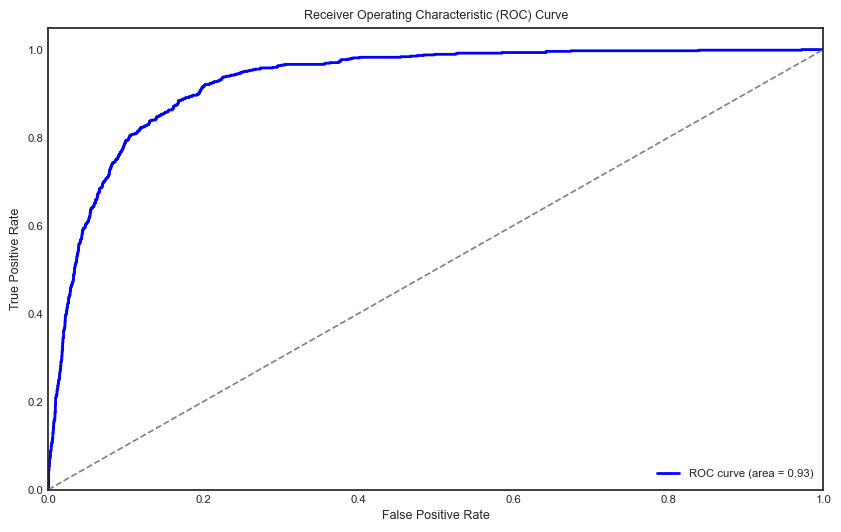

In [85]:
# Get predicted probabilities for the positive class
y_prob = model1.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()